# Analsying the Athletes_Data dataset

## Importing all the stuff

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")


In [2]:
plt.style.use('ggplot')

### Importing the dataset from github repository

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/njuliann/athlete_events/refs/heads/main/athlete_events.csv")


### Copy dataset and sort it by years

Taking the copied dataset and sort the entries by year. This has the purpose to make a visualisation of missing values by column and therefore to see whether there is a significant amount of missing data in for example early years. 

In [4]:
df_to_sort_by_year = df.copy()
df_to_sort_by_year.sort_values(by='Year', inplace=True)

Checking the shape of the dataset to see whether the import has worked successfully

In [5]:
[True if df.shape == (271116, 15) else False]

[True]

## Getting a quick overview about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


One can directly see some special things in the dataset: 
- The 'Games' column contains the same data but combined as the 'Year' and 'Season' columns do → Drop the column
- There are missing values in the 'Height' and 'Weight' columns (and maybe in others too) → Find a way to either fill these cells with plausible values or drop them
- There are missing values in the 'Medal' column, probably if an athlete did not win a medal in the coresponding games
- The 'Team' column doesn't necessarily contain just the country for which the athlete started. So it might be better to take the 'NOC' column to determine the nationality (see also the number of unique teams below)

In [8]:
df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


### Checking for duplicates

In [9]:
df[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [10]:
df.duplicated().sum()

np.int64(1385)

It seems that most duplicate values are in Art Competitions beteween 1920 and 1950

### Finding missing values

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<Axes: >

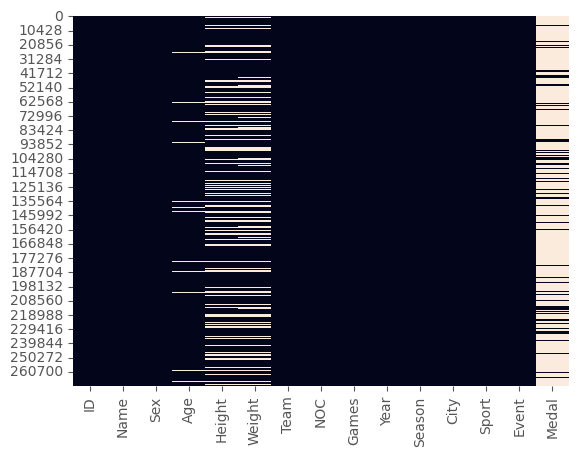

In [12]:
sns.heatmap(df.isnull(), cbar = False)

Do the same visualisation for the dataset that is sorted by years.

<Axes: ylabel='Year'>

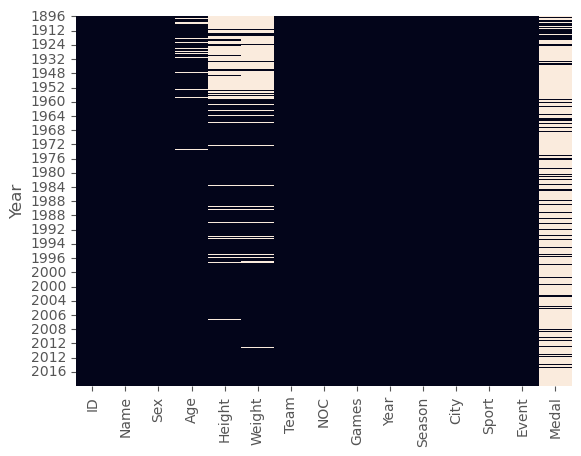

In [13]:
df_to_sort_by_year.index = df_to_sort_by_year['Year']
sns.heatmap(df_to_sort_by_year.isnull(), cbar = False)


You can see that there is a clear trend in the data. Up to 1960 there are many missing values for the Height and Weight columns. After 1960 it looks like there are just some single values missing in these two columns. There will be a visualisation of the mean/median height and weigth development some cells below. That's the reason why the visualisation above is included. 

## Cleaning the dataset

### Removing the duplicates

In [14]:
print('Number of duplicate values before cleaning: ', df.duplicated().sum())
df.drop_duplicates(inplace = True)
print('Number of duplicate values after cleaning:  ', df.duplicated().sum())

Number of duplicate values before cleaning:  1385
Number of duplicate values after cleaning:   0


### Dropping 'Games' column

The 'Games' column contains the same values as the 'Year' and 'Season' columns. As this provides no additional value it can be dropped. 

In [15]:
df.drop(['Games'], axis = 1, inplace = True)

### Dealing with missing values

#### Age

In [16]:
df.Age.fillna(round(df.Age.median()), inplace = True)

#### Height

In [17]:
df.Height.fillna(round(df.Height.median()), inplace = True)

#### Weight

In [18]:
df.Weight.fillna(round(df.Weight.median()), inplace = True)

## Exploring the data

### On country-level

#### Which countries have sent the most athletes each year?

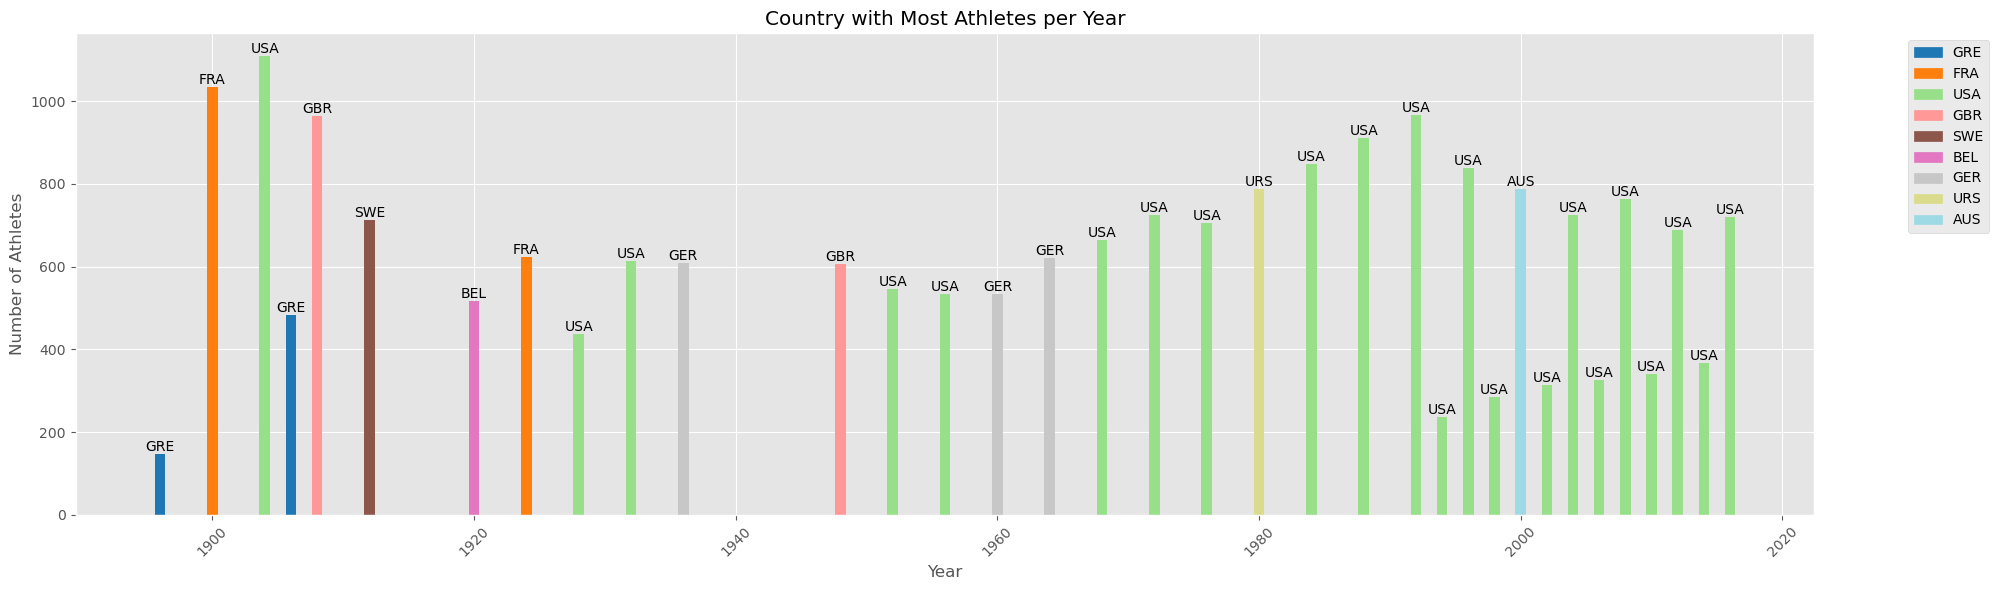

In [19]:
# Group by Year and NOC, count athletes, then get the top country for each year
top_athletes_countries = df.groupby(['Year', 'NOC']).size().reset_index(name='count')
top_athletes_countries = top_athletes_countries.loc[top_athletes_countries.groupby('Year')['count'].idxmax()]

# Create a color map for unique countries
unique_countries = top_athletes_countries['NOC'].unique()
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_countries)))
color_dict = dict(zip(unique_countries, colors))

# Create the visualization
plt.figure(figsize=(20,6))

# Plot bars with different colors based on country
for i, row in top_athletes_countries.iterrows():
    plt.bar(row['Year'], row['count'], color=color_dict[row['NOC']])
    plt.text(row['Year'], row['count'], row['NOC'], 
             ha='center', va='bottom')

plt.title('Country with Most Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, color=color_dict[country], label=country) 
                  for country in unique_countries]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The USA have sent the most athletes for most events. There was more diversity before the Second World War.

#### Which countries got the most medals each year?

When trying to anser this question, a major problem arised. According to the exemplary output below, the United States earned 139 Gold, 54 Silver and 71 Bronze medals. According to Wikipedia, they only got 46 Gold, 37 Silver and 38 Bronze medals. 
The reason for this is probably that there are team events where in the dataset every athlete has a medal, but in the official count they only count as one medal. This leads to an overestimated medal count if a country is successful in team sports. 
By combining the corresponding athletes and count the team event as one, the correct number of medals should be the result. 

In [20]:
usa_2016_medals = df[(df['Year'] == 2016) & (df['NOC'] == 'USA') & (df['Medal'].notnull())]
usa_2016_medals.groupby('Medal').size()

Medal
Bronze     71
Gold      139
Silver     54
dtype: int64

#### More athletes → more gold medals?

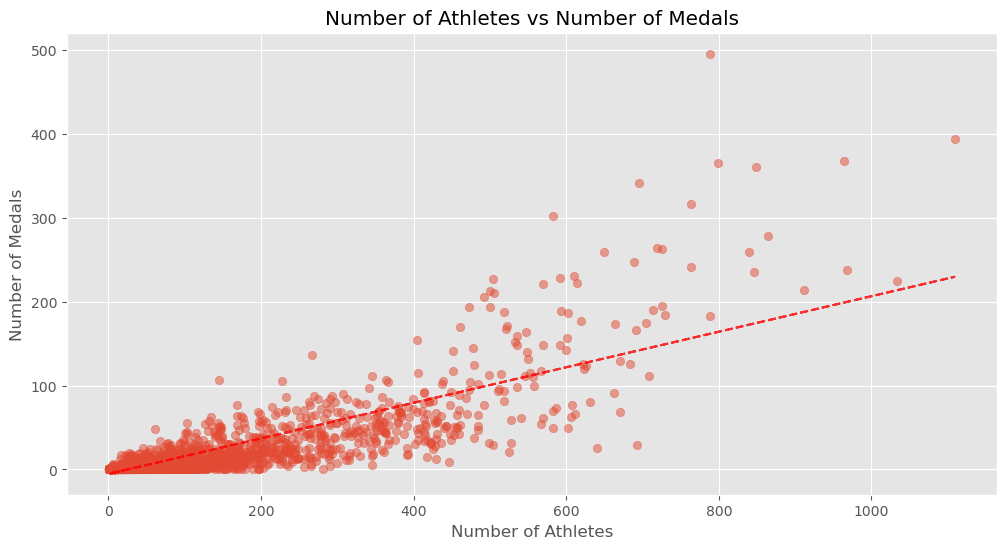

In [24]:
# Create a dataset with number of athletes and medals per country per year
athlete_medal_correlation = df.groupby(['Year', 'NOC']).agg({
    'ID': 'count',  # count of athletes
    'Medal': lambda x: x.notna().sum()  # count of medals
}).reset_index()

athlete_medal_correlation.columns = ['Year', 'NOC', 'Athletes', 'Medals']

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(athlete_medal_correlation['Athletes'], athlete_medal_correlation['Medals'], alpha=0.5)
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.title(f'Number of Athletes vs Number of Medals')

# Add trend line
z = np.polyfit(athlete_medal_correlation['Athletes'], athlete_medal_correlation['Medals'], 1)
p = np.poly1d(z)
plt.plot(athlete_medal_correlation['Athletes'], p(athlete_medal_correlation['Athletes']), "r--", alpha=0.8)

plt.grid(True)
plt.show()


### On athletes-level

#### Distribution of medals

In [25]:
print('Medal distribution: ', df['Medal'].value_counts())

Medal distribution:  Medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64


When looking at the medals, you can see that Gold > Bronze > Silver. 
Usually they should be the same number. Finding out whether there are too many gold or not enough silver medals in the dataset and which medals belong to each other would take way too much time. Regarding the small difference (261 'missing' Silver medals) and the lenght of the dataset (269731 total values) I will just ignore this.  

#### Distribution of athletes by gender

<Axes: title={'center': 'Athlete Gender Distribution'}, xlabel='Sex'>

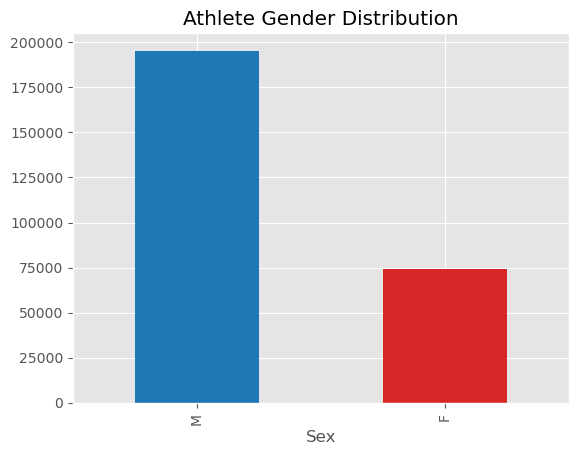

In [26]:
df.Sex.value_counts().plot(kind = 'bar', title = 'Athlete Gender Distribution', color = ['tab:blue' , 'tab:red'],  grid = True)

In [27]:
print(f"{df.Sex.value_counts()["M"]} men and {df.Sex.value_counts()["F"]} women have participated in the Olympic Games")

195353 men and 74378 women have participated in the Olympic Games


#### Distribution of athletes by gender and year

<Figure size 1500x500 with 0 Axes>

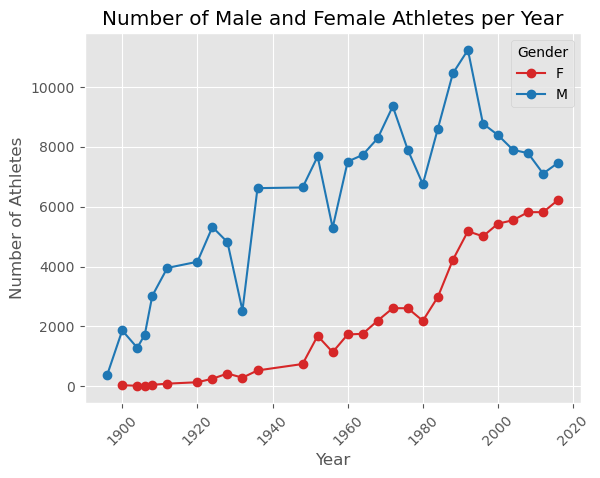

In [28]:
# Group by year and gender, count athletes
athletes_by_year_gender = df.groupby(['Year', 'Sex']).size().unstack()

# Winter games have much less participants, so drop them to have a better looking plot
athletes_by_year_gender.drop([1994, 1998, 2002, 2006, 2010, 2014], inplace = True)

# Create plot
plt.figure(figsize = (15, 5))

athletes_by_year_gender.plot(kind = 'line', stacked = False, color = ['tab:red', 'tab:blue'], marker = 'o')

plt.title('Number of Male and Female Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title = 'Gender')
plt.xticks(rotation = 45)

plt.show()


#### Age distribution

Text(0.5, 1.0, 'Age Distribution of Athletes')

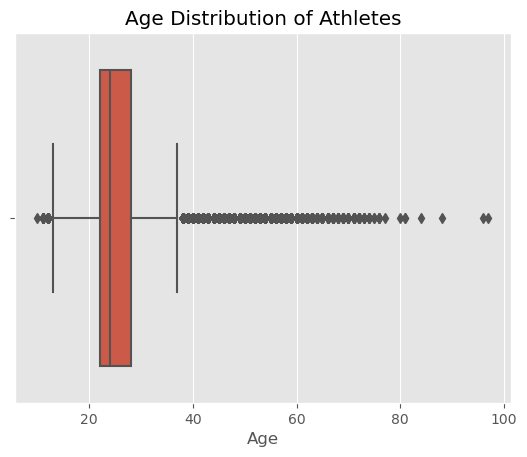

In [29]:
sns.boxplot(x = df.Age)
plt.title('Age Distribution of Athletes')

#### Did the mean and the median height change over the decades?

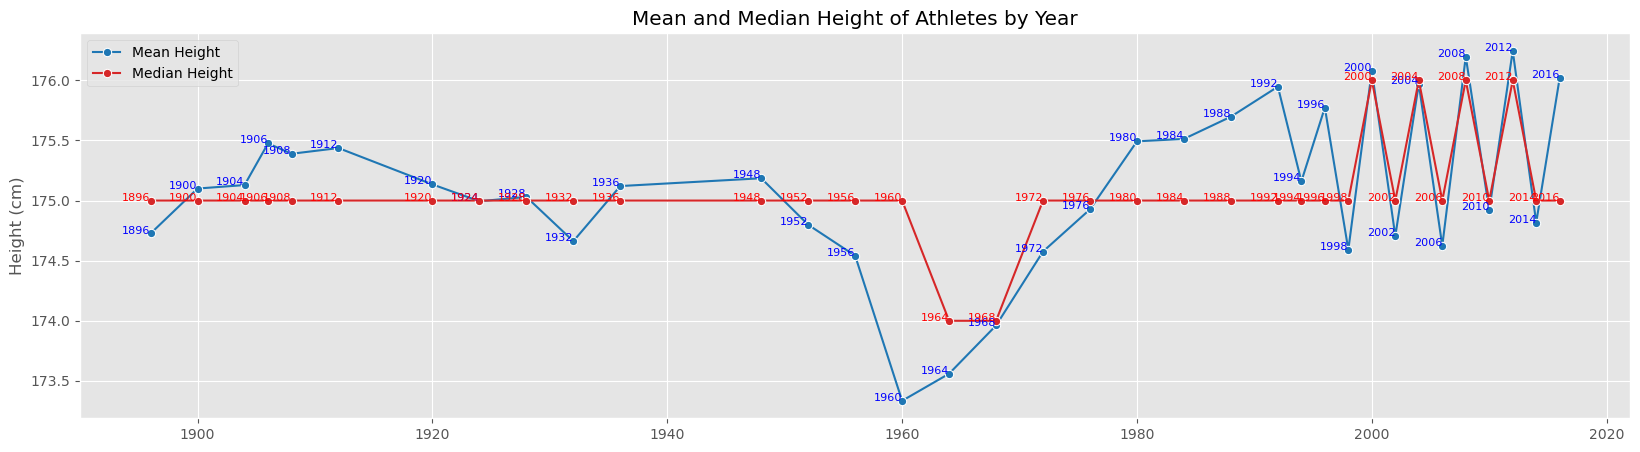

In [30]:
mean_height_by_year = {year: df[df['Year'] == year]['Height'].mean() for year in df['Year'].unique()}
median_height_by_year = {year: df[df['Year'] == year]['Height'].median() for year in df['Year'].unique()}

plt.figure(figsize = (20, 5))
sns.lineplot(x = list(mean_height_by_year.keys()), y = list(mean_height_by_year.values()), color = 'tab:blue', label = 'Mean Height', marker = 'o')
for year, height in mean_height_by_year.items():
    plt.text(year, height, str(year), color = 'blue', fontsize = 8, ha = 'right')

sns.lineplot(x = list(median_height_by_year.keys()), y = list(median_height_by_year.values()), color = 'tab:red', label = 'Median Height', marker = 'o')
for year, height in median_height_by_year.items():
    plt.text(year, height, str(year), color = 'red', fontsize = 8, ha = 'right')

plt.title('Mean and Median Height of Athletes by Year') 
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

In [31]:
median_height_until_1956 = df[df['Year'] <= 1956]['Height'].median()
median_height_after_1956 = df[df['Year'] > 1956]['Height'].median()

print('Until 1956: ', median_height_until_1956, '    After 1956: ', median_height_after_1956)
print(median_height_until_1956 * 10)

Until 1956:  175.0     After 1956:  175.0
1750.0


It seems like there is some change of measurement in the dataset. Until 1956 the median height was at about 24 units and from 1960 on it was 175 units (most probably cm). So any analysis including the height should be limited to the Games after 1960.

#### Did the mean and the median height change over the decades?

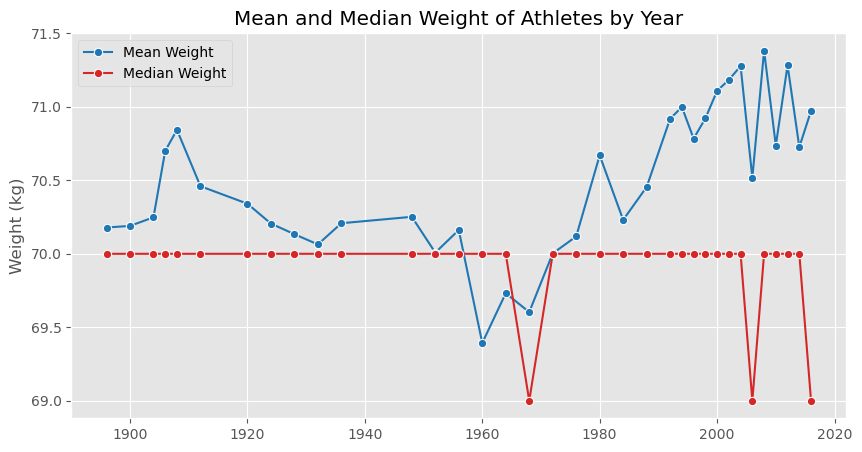

In [32]:
mean_weight_by_year = {year: df[df['Year'] == year]['Weight'].mean() for year in df['Year'].unique()}
median_weight_by_year = {year: df[df['Year'] == year]['Weight'].median() for year in df['Year'].unique()}

plt.figure(figsize = (10, 5))
sns.lineplot(x = list(mean_weight_by_year.keys()), y = list(mean_weight_by_year.values()), color = 'tab:blue', label = 'Mean Weight', marker = 'o')
sns.lineplot(x = list(median_weight_by_year.keys()), y = list(median_weight_by_year.values()), color = 'tab:red', label = 'Median Weight', marker = 'o')

plt.title('Mean and Median Weight of Athletes by Year') 
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

The same problem with the height occurs also when looking at the median and mean weight. It looks like there is some change in measurement after the 1956 olympics. 
That is the reason why I duplicated the dataset in the beginning of the analysis afterwards and created the second heatmap which visualizes the missing values for the years. 


#### Did the mean and the median age change over the decades?

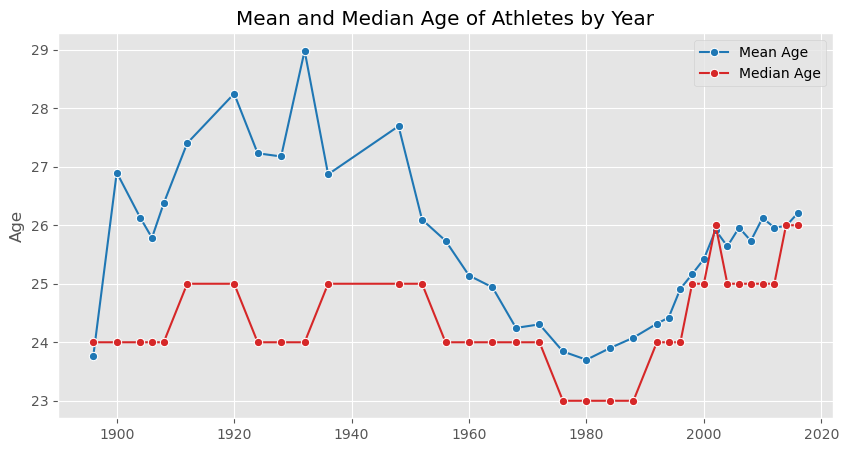

In [33]:
mean_age_by_year = {year: df[df['Year'] == year]['Age'].mean() for year in df['Year'].unique()}
median_age_by_year = {year: df[df['Year'] == year]['Age'].median() for year in df['Year'].unique()}

plt.figure(figsize = (10, 5))
sns.lineplot(x = list(mean_age_by_year.keys()), y = list(mean_age_by_year.values()), color = 'tab:blue', label = 'Mean Age', marker = 'o')
sns.lineplot(x = list(median_age_by_year.keys()), y = list(median_age_by_year.values()), color = 'tab:red', label = 'Median Age', marker = 'o')

plt.title('Mean and Median Age of Athletes by Year') 
plt.ylabel('Age')
plt.legend()
plt.show()

### 

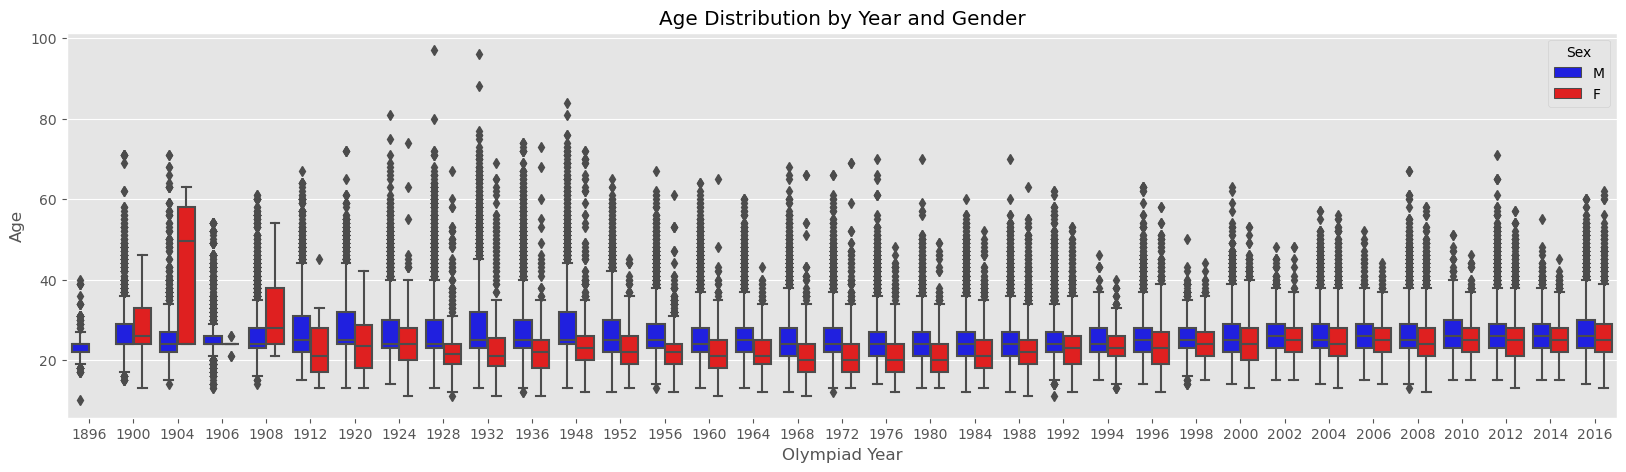

In [35]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'Year', y = 'Age', hue = 'Sex', data = df, palette = {'M': 'blue', 'F': 'red'})
plt.xlabel('Olympiad Year')
plt.ylabel('Age')
plt.title('Age Distribution by Year and Gender')
plt.show()

### How did the (former) Soviet Union evolve?

In [ ]:
# Defining the members of the soviet union
# The last one (EUN) is the Unified Team, which was a joint team consisting of the former Soviet Union countries that participated in the 1992 Summer Olympics
soviet_republics = ['RUS', 'ARM', 'AZE', 'BLR', 'EST', 'GEO', 'KAZ', 'KGZ', 'LAT', 'LTU', 'MDA', 'TKM', 'TJK', 'UKR', 'UZB', 'EUN']

# Filter the dataset to only gold medals
gold_medals = df[(df['Medal'] == 'Gold') & (df['Season'] == 'Summer')]

# Count the number of gold medals won by the soviet union until 1991
soviet_gold_medals = gold_medals[gold_medals['NOC'] == 'URS']
print(soviet_gold_medals.groupby('Year').size().reset_index(name = 'Gold Medals'))
print('_' * 25)

# Count the number of gold medals won by the former members of the soviet union after 1991
post_soviet_medals = gold_medals[(gold_medals['Year'] >= 1991) & (gold_medals['NOC'].isin(soviet_republics))]
print(post_soviet_medals.groupby('Year').size().reset_index(name = 'Gold Medals'))

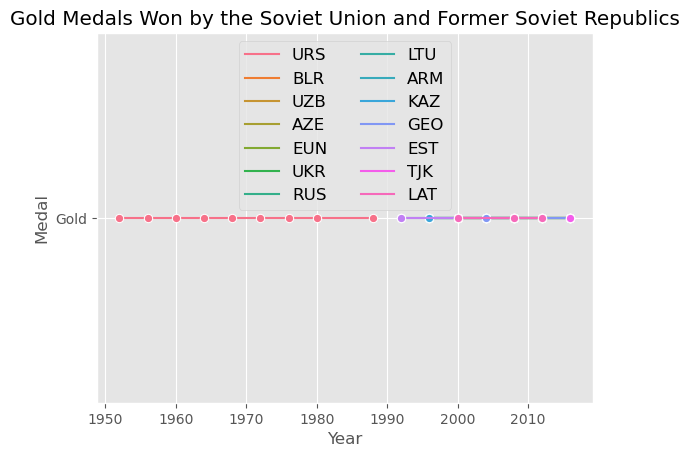

In [63]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)

sns.lineplot(data = pd.concat([soviet_gold_medals, post_soviet_medals]), x = 'Year', y = 'Medal', hue = 'NOC', marker = 'o')
plt.axvline = (1991)
plt.text = (1991, 'Dissolution of the Soviet Union')
plt.title('Gold Medals Won by the Soviet Union and Former Soviet Republics')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title = None, fontsize = 12, loc = 'upper center', frameon = True, ncol = 2)
plt.show()